# The data - Vaccination
#### The COVID-19 pandemic has been a global health crisis that has affected communities, countries, and regions around the world. As nations strive to control the spread of the virus and protect public health, vaccination has emerged as a critical tool in the fight against COVID-19. To analyze and understand the progress of vaccination efforts, we present a comprehensive dataset that provides valuable insights into the administration of COVID-19 vaccines.

#### Our dataset encompasses a wide range of information related to COVID-19 vaccinations, with a primary focus on the following key component:
#### Location Key: The "location_key" serves as a unique identifier for countries and subregions. This identifier facilitates data merging and correlation across various datasets, enabling us to gain a holistic understanding of the vaccination landscape at both the national and regional levels.

#### The dataset covers multiple COVID-19 vaccine types, including Pfizer, Janssen (Johnson & Johnson), Moderna, and Sinovac, among others. This comprehensive coverage enables us to explore variations in vaccination strategies and the efficacy of different vaccines. The inclusion of "location_key" ensures that regional disparities and trends can be examined, aiding in the formulation of targeted vaccination strategies.

#### In summary, our COVID-19 vaccination dataset provides a valuable resource for those seeking to assess and understand the dynamics of vaccination efforts on a global scale. It empowers users to explore the effectiveness of different vaccines, identify areas of concern, and inform evidence-based decision-making in the ongoing battle against the pandemic.

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the data

In [147]:
vaccinations = pd.read_csv("vaccinations.csv")
vaccinations.head()

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2021-01-25,AD,NaN,576.0,NaN,NaN,NaN,576.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,AD,460.0,1036.0,NaN,NaN,460.0,1036.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-10,AD,255.0,1291.0,NaN,NaN,255.0,1291.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-12,AD,331.0,1622.0,NaN,NaN,331.0,1622.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-19,AD,519.0,2141.0,NaN,NaN,519.0,2141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
print("The number of rows and columns are:" , vaccinations.shape)
print()
print("Variables of interest in the data set are:", vaccinations.columns)

The number of rows and columns are: (2545118, 32)

Variables of interest in the data set are: Index(['date', 'location_key', 'new_persons_vaccinated',
       'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated',
       'cumulative_persons_fully_vaccinated', 'new_vaccine_doses_administered',
       'cumulative_vaccine_doses_administered',
       'new_persons_vaccinated_pfizer', 'cumulative_persons_vaccinated_pfizer',
       'new_persons_fully_vaccinated_pfizer',
       'cumulative_persons_fully_vaccinated_pfizer',
       'new_vaccine_doses_administered_pfizer',
       'cumulative_vaccine_doses_administered_pfizer',
       'new_persons_vaccinated_moderna',
       'cumulative_persons_vaccinated_moderna',
       'new_persons_fully_vaccinated_moderna',
       'cumulative_persons_fully_vaccinated_moderna',
       'new_vaccine_doses_administered_moderna',
       'cumulative_vaccine_doses_administered_moderna',
       'new_persons_vaccinated_janssen',
       'cumulative_persons_vacc

In [149]:
unique_location_keys = vaccinations["location_key"].unique()
#print("Options in location_key:")
#for location_key in unique_location_keys:
#    print(location_key)

### Only the data per country are necessary, therefore remove all rows for subregions, which are denoted by the locations with "_" under the location_key column and we also drop the rows that th location_key is empty.

## Dropping the location_key that contains _ and are empty

In [150]:
vaccinations = vaccinations[vaccinations['location_key'].str.contains('_') == False]
vaccinations.dropna(subset=['location_key'], inplace=True)
vaccinations

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2021-01-25,AD,NaN,576.0,NaN,NaN,NaN,576.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,AD,460.0,1036.0,NaN,NaN,460.0,1036.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-10,AD,255.0,1291.0,NaN,NaN,255.0,1291.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-12,AD,331.0,1622.0,NaN,NaN,331.0,1622.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-19,AD,519.0,2141.0,NaN,NaN,519.0,2141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545113,2022-08-21,ZW,365.0,6400632.0,416.0,4715815.0,2011.0,12105303.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2545114,2022-08-24,ZW,3621.0,6404253.0,3488.0,4719303.0,15923.0,12121226.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2545115,2022-08-25,ZW,3684.0,6407937.0,2897.0,4722200.0,12159.0,12133385.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2545116,2022-08-27,ZW,3069.0,6411006.0,2899.0,4725099.0,12206.0,12145591.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for missing values

In [151]:
missing_values = vaccinations.isnull().sum()
missing_values

date                                                 0
location_key                                         0
new_persons_vaccinated                            1296
cumulative_persons_vaccinated                     4087
new_persons_fully_vaccinated                      3360
cumulative_persons_fully_vaccinated               5854
new_vaccine_doses_administered                     951
cumulative_vaccine_doses_administered             1442
new_persons_vaccinated_pfizer                    55304
cumulative_persons_vaccinated_pfizer             55304
new_persons_fully_vaccinated_pfizer              54762
cumulative_persons_fully_vaccinated_pfizer       54761
new_vaccine_doses_administered_pfizer            55331
cumulative_vaccine_doses_administered_pfizer     55330
new_persons_vaccinated_moderna                   55873
cumulative_persons_vaccinated_moderna            55873
new_persons_fully_vaccinated_moderna             55331
cumulative_persons_fully_vaccinated_moderna      55330
new_vaccin

### There are several missing values in our dataset so we decide to remove variable that most of their rows are missing values.

## Dropping some columns

In [152]:
columns_to_drop = ['new_persons_vaccinated_pfizer', 'cumulative_persons_vaccinated_pfizer',
       'new_persons_fully_vaccinated_pfizer',
       'cumulative_persons_fully_vaccinated_pfizer',
       'new_vaccine_doses_administered_pfizer',
       'cumulative_vaccine_doses_administered_pfizer',
       'new_persons_vaccinated_moderna',
       'cumulative_persons_vaccinated_moderna',
       'new_persons_fully_vaccinated_moderna',
       'cumulative_persons_fully_vaccinated_moderna',
       'new_vaccine_doses_administered_moderna',
       'cumulative_vaccine_doses_administered_moderna',
       'new_persons_vaccinated_janssen',
       'cumulative_persons_vaccinated_janssen',
       'new_persons_fully_vaccinated_janssen',
       'cumulative_persons_fully_vaccinated_janssen',
       'new_vaccine_doses_administered_janssen',
       'cumulative_vaccine_doses_administered_janssen',
       'new_persons_vaccinated_sinovac', 'total_persons_vaccinated_sinovac',
       'new_persons_fully_vaccinated_sinovac',
       'total_persons_fully_vaccinated_sinovac',
       'new_vaccine_doses_administered_sinovac',
       'total_vaccine_doses_administered_sinovac']  
vaccinations = vaccinations.drop(columns=columns_to_drop)

In [153]:
vaccinations

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered
0,2021-01-25,AD,NaN,576.0,NaN,NaN,NaN,576.0
1,2021-02-01,AD,460.0,1036.0,NaN,NaN,460.0,1036.0
2,2021-02-10,AD,255.0,1291.0,NaN,NaN,255.0,1291.0
3,2021-02-12,AD,331.0,1622.0,NaN,NaN,331.0,1622.0
4,2021-02-19,AD,519.0,2141.0,NaN,NaN,519.0,2141.0
...,...,...,...,...,...,...,...,...
2545113,2022-08-21,ZW,365.0,6400632.0,416.0,4715815.0,2011.0,12105303.0
2545114,2022-08-24,ZW,3621.0,6404253.0,3488.0,4719303.0,15923.0,12121226.0
2545115,2022-08-25,ZW,3684.0,6407937.0,2897.0,4722200.0,12159.0,12133385.0
2545116,2022-08-27,ZW,3069.0,6411006.0,2899.0,4725099.0,12206.0,12145591.0


## Handling missing data
### imputed the missing values with the median value of the column

In [158]:
mean_value_new_persons_vaccinated = vaccinations['new_persons_vaccinated'].median()
vaccinations['new_persons_vaccinated'].fillna(mean_value_new_persons_vaccinated, inplace=True)

mean_value_cumulative_persons_vaccinated = vaccinations['cumulative_persons_vaccinated'].median()
vaccinations['cumulative_persons_vaccinated'].fillna(mean_value_cumulative_persons_vaccinated, inplace=True)

mean_value_new_persons_fully_vaccinated = vaccinations['new_persons_fully_vaccinated'].median()
vaccinations['new_persons_fully_vaccinated'].fillna(mean_value_new_persons_fully_vaccinated, inplace=True)

mean_value_cumulative_persons_fully_vaccinated = vaccinations['cumulative_persons_fully_vaccinated'].median()
vaccinations['cumulative_persons_fully_vaccinated'].fillna(mean_value_cumulative_persons_fully_vaccinated, inplace=True)

mean_value_new_vaccine_doses_administered = vaccinations['new_vaccine_doses_administered'].median()
vaccinations['new_vaccine_doses_administered'].fillna(mean_value_new_vaccine_doses_administered, inplace=True)

mean_value_cumulative_vaccine_doses_administered = vaccinations['cumulative_vaccine_doses_administered'].median()
vaccinations['cumulative_vaccine_doses_administered'].fillna(mean_value_cumulative_vaccine_doses_administered, inplace=True)


### Variables that we decided to move on with:
#### date:	date (YYYY-MM-DD) of the datapoint	2021-02-07
#### location_key:	Unique string identifying the region ID
#### new_persons_vaccinated: Count of new persons which have received one or more doses
#### cumulative_persons_vaccinated:	Cumulative sum of persons which have received one or more doses
#### new_persons_fully_vaccinated: Count of new persons which have received all doses required for maximum immunity
#### cumulative_persons_fully_vaccinated: Cumulative sum of persons which have received all doses required for maximum immunity
#### new_vaccine_doses_administered: Count of new vaccine doses administered to persons	9146
#### cumulative_vaccine_doses_administered: integer	Cumulative sum of vaccine doses administered to persons	923449


## Creating new column by Date (year)

In [155]:
vaccinations['date'] = pd.to_datetime(vaccinations['date'])
vaccinations['year'] = vaccinations['date'].dt.year
vaccinations = vaccinations.drop(columns = ["date"])
vaccinations

,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,year
0,AD,3542.0,576.0,3318.0,2246976.0,15755.5,576.0,2021
1,AD,460.0,1036.0,3318.0,2246976.0,460.0,1036.0,2021
2,AD,255.0,1291.0,3318.0,2246976.0,255.0,1291.0,2021
3,AD,331.0,1622.0,3318.0,2246976.0,331.0,1622.0,2021
4,AD,519.0,2141.0,3318.0,2246976.0,519.0,2141.0,2021
...,...,...,...,...,...,...,...,...
2545113,ZW,365.0,6400632.0,416.0,4715815.0,2011.0,12105303.0,2022
2545114,ZW,3621.0,6404253.0,3488.0,4719303.0,15923.0,12121226.0,2022
2545115,ZW,3684.0,6407937.0,2897.0,4722200.0,12159.0,12133385.0,2022
2545116,ZW,3069.0,6411006.0,2899.0,4725099.0,12206.0,12145591.0,2022


## Checking for outliers

In [159]:
vaccinations.describe().applymap("{0:.2f}".format)

,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,year
count,55873.00,55873.00,55873.00,55873.00,55873.00,55873.00,55873.00
mean,84799.91,21625054.86,74165.26,17566531.32,222526.98,63139358.49,2021.35
std,2017325.67,87031641.57,763839.17,73694711.85,1063319.64,292729575.31,0.51
min,-1106411.00,0.00,-935815.00,0.00,-189667.00,0.00,2020.00
25%,248.00,476378.00,270.00,369324.00,1994.00,714786.00,2021.00
50%,3542.00,2920692.00,3318.00,2246976.00,15755.50,5104026.00,2021.00
75%,25397.00,10071461.00,21031.00,7926434.00,88062.00,21322717.00,2022.00
max,450500000.00,1302773000.00,112393000.00,1270656000.00,48622062.00,3434774000.00,2022.00


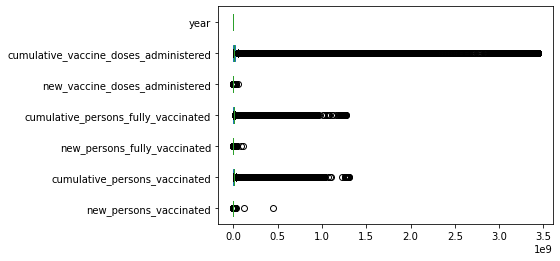

In [160]:
vaccinations.plot.box(vert=False)
plt.show()